# Predicting Diameter and Physical Harm of Asteroids using Machine Learning
**Authors** :
Colin Campbell (c_c953),  Leah Lewis (lrl68), Ryan Wakabayashi (rjw102) and Jake Worden (jrw294)

**Abstract** :  [  ]

## Introduction

 

 

## Problem Statement 
Question: How to use machine learning to predict the diameter of asteroids and classify them as physically hazardous.
* Asteroid diameter prediction based upon Asteroid_Updated.csv from Kaggle.
* Predict whether an asteroid is physically hazardous to Earth. 

* Success measures:
	* 5 - 10 fold CV accuracy for all models
	* Regression models: R^2 score
	* Classification models: Precision, Recall, ROC/AUC
	
* Hope to achieve >85% R^2 for regression models (based upon kaggle responses) and then >=80% precision and recall for the classification models (low goal based on amount of data for imbalanced classes).

### Related Work

The ability to take in data on nearby asteroids and identify whether or not they are a threat to life on earth is important for civilization going forward. One of the most important attributes to identify if an asteroid is a threat is the diameter of the asteroid. Companies like Nasa and SpaceX are currently working on technologies to identify these threats. Because this is something that is currently being researched in the field, it is important to try and identify what other attributes will help identify how hazardous these asteroids will be.

**Links to other work:** [Asteroid Diameter Estimators](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty),
                        [Asteroid Diameter Prediction](https://www.kaggle.com/titanpointe/asteroid),
                        [Asteroid Impact](https://www.sciencedirect.com/topics/engineering/asteroid-impact),

**Reasons to care:** [Planetary Defense](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty)

## Data Management 


### Data Gathering

Links to the database and dataset used can be found below:

*Small-Body DataBase Link:* [Jet Propulsion Laboratory Solar System Dynamics](https://ssd.jpl.nasa.gov/sbdb_query.cgi)

*Open Asteroid Dataset Link:* [Asteroid_Updated.csv](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv)

#### Open Asteroid Dataset Description:

1. The dataset was created on behalf of NASA by the Jet Propulsion Laboratory (JPL) at California Institute of Technology's "Solar System Dynamics"(SSD) group. One of the primary responsibilites of the SSD group is to maintain the Small-Body DataBase (SBDB) which is comprised of information relating to the orbits, physical parameters, discovery cirumstances and hazard assements for all known small-bodies in our solar system. In this context, small-bodies are defined as comets and asteroids, where “asteroids” includes Kuiper-belt objects (TNOs) and dwarf planets. This database is actively kept up-to-date, meaning as new data is made available for both new and existing small-bodies, new orbits are automatically computed typically within an hour or two.


2. The dataset used here was gathered from the SSD's SBDB via the Open Asteroid Dataset challange posted on [Kaggle](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv).


3. The dataset itself is composed of various instances of small-bodies along with their respective oribital elements. A summary of each of these elements or features along with a brief desciption can be seen in the following table:

| Feature | Description |
| ------- | ----------- |
| a | Semi-major axis(au) | 
| e | Eccentricity | 
| i | Inclination with respect to x-y ecliptic plain(deg) |
| om | Longitude of the ascending node |
| w | Argument of perihelion |
| q | Perihelion distance(au) |
| ad | Aphelion distance(au) |
| per_y | Oribital period(YEARS) |
| data_arc | Data arc-span(d) | float64 |
| condition_code | Orbit condition code |
| n_obs_used | Number of Observation used |
| H | Absolute magnitude parameter |
| neo | Near Earth Object | object |
| pha | Physically Hazardous Asteroid |
| diameter | Diameter of asteroid(Km) |
| extent | Object bi/tri axial ellipsoid dimensions(Km) |
| albedo | Geometric albedo |
| rot_per | Rotation Period(h) |
| GM | Standard gravitational parameter, Product of mass and gravitational constant |
| BV | Color index B-V magnitude difference |
| UB | Color index U-B magnitude difference |
| IR | Color index I-R magnitude difference |
| spec_B | Spectral taxonomic type(SMASSII) |
| spec_T | Spectral taxonomic type(Tholen) |
| G | Magnitude slope parameter |
| moid | Earth minimum orbit intersection distance(au) |
| class | Asteroid orbit class |
| n | Mean motion(deg/d) |
| per | Orbital period(d) |
| ma | Mean anomaly(deg) |

#### The data gathering phase will attempt to answer the following questions in regards to the dataset :

1. How many data entries are there and what datatypes are present?
2. How many null values, if any, are present in the dataset?
3. How many resources, in terms of memory, are used by the dataset?

**Importing all libraries for data gathering**

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd

**Read the csv file using pandas read_csv() method and print the first five entries**

In [4]:
#df = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_Updated.csv")
df= pd.read_csv("../Asteroid_Updated.csv")
df.head()

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

**Use pandas shape method to identify the amount of data available**

In [5]:
df.shape

(839714, 31)

**Use pandas info method to identify the data types, null values and memory usage**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

From the data gathering, the following was obtained in relation to the initial inquries regarding the dataset:

1. There are a total of **839,714 data entries** each with **31 features** to explore. Of these features there are **21 float64**, **1 int64**, and **9 object data types**. 
2. Some features contain 0 null values while others contain more than **700,000 nulls**.
3. The data's memory usage is approximately **198.6MB**. 

**Based on this information, the data will need to undergo some exstensive pre-processing prior to any exploratory data analysis .**

### Data Pre-processing, Cleaning, Labeling, and Maintenance 

Initial data gathering showed that the dataset is comprised of 839,714 data entries consisting of 31 variables made up of 3 different data types (float64, int64, object). Additionaly, it was determined that while some of the data entries' features contained no null values, it was shown that approximately 700,000 entries contained at least one null value if not many more. Since the goal of this project is to create both a regressor and a classifer for targeting diameter and physically harzardous asteriod respectively there is a need to address the frequency of null value occurences throughout the dataset.

#### This phase of data expolartion will attempt to  address the following concerns: 
 
1. What features have a high number of Nulls? How will these null values be addressed for both regression and classification?
2. How will the incorrect data types be handled for regression?
3. How will any class imbalance be handled for classification?

**Importing all libraries for data pre-processing, cleaning, labeling and maintenance**

In [7]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.utils import resample
import pandas as pd

### Answering Q1 from Data Pre-processing, Cleaning, and Maintence?

The results of the initial data gathering had shown the existence of a larger quantity of null values within the dataset. The pandas module can be used to print the sum of null values to determine which columns had a high percentage of null values. If either of the targets (diameter, pha) are present amoungst the columns, additional data cleaning will be needed prior to any exploratory data analysis. Otherwise any other column found to contain a large frequency of null values can be discarded from the dataframe as they will not be useful for either regression or classification.

***Use pandas isnull and sum methods to print the sum of null values within the dataframe***

In [8]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


As shown in the above cell output, 12 of the 31 features contained about 700,000 null values. Amongst these 12 features was diameter, the target for regression, with a total sum of 702,078 null values. The removal of these entries with null values for diameter would greatly diminish the size of the dataset, therefore the remaining 11 features can be dropped from the dataframe for now. 

**Use pandas drop method to drop the features from the dataframe**

In [9]:
columns = ['name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'G', 'UB', 'IR', 'spec_B', 'spec_T']
df.drop(columns=columns, inplace=True)

Now that the 11 features containing more than 700,000 null values have been dropped from the dataframe, pandas can used again to determine the remaining number of null values needing to processed prior to exploratory data analysis.

***Use pandas isnull and sum methods to print the summ of null values within the dataframe***

In [10]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


*Voila!* From the above cell it is shown that the dataframe contains a significant less amount of null values and the remaining data is now constrained only by the null values present in the target features. Any further processing will need to address the specific data needs as it pertains to either classification or regression.

### Answering Q2 from Data Pre-processing, Cleaning, and Maintence

During data gathering, there were 9 categorical features observed to be of type object within the dataset. Of these 9 features, 5 were dropped during the initial cleaning and the remaining 4 features, ***pha***, ***neo***, ***condition_code*** and ***class*** contained only categorical data. In order for these remaining 4 features to be used by a machine learning algorithm they must first be converted from categorical to numerical data types. After converting these features, any further remaining data of incorrect type must also be converted to numeric values before attempting to drop the remaining null values from the dataframe.


**Create seperate dataframe to be used for regression**

In [11]:
df_regression = df

Currently the values belonging to both ***pha*** and ***neo*** features can either be '*Y*' or '*N*', while the values belonging to the ***condition_code*** feature range from *0* to *9*, '*D*', and '*E*'. By using the map method provided by the pandas module, each value within the provided dictionary can easily be mapped to corresponding nurmerical values.

**Use dictionaries along with pandas map method to transform categorical data to numerical data**

In [12]:
df_regression['pha'] = df_regression['pha'].map({'Y': 1, 'N': 0})
df_regression['neo'] = df_regression['neo'].map({'Y': 1, 'N': 0})
df_regression['condition_code'] = df_regression['condition_code'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 'D': 11, 'E': 12})

Results from the above transformation now have ***pha*** and ***neo*** features containing either the value *0* or *1* and the new condition_code feature values ranging from *1* to *12*.

Unlike the values belonging to the 3 features converted in the above cell, the values belonging to the ***class*** feature do not share any sort of sequential meaning or state with one another. Therefore, a label encoder can be used to map the feature values to arbitrary numerical representations.

**Use Label Encoder to transform categorical data to numerical data**

In [13]:
df_regression['class'] = le().fit_transform(df_regression['class'])

Now that each of the features initialy containing categorical objects have all been transformed to numerical data types, pandas again can be used to show the amount of null values remaining in the update dataframe.

**Print the sum of null values in the dataframe following the encoding**

In [14]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code    249756
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


**Set any non numeric values in diameter to NaN using the pandas to_numeric method**

In [15]:
df_regression = df_regression.apply(lambda x: pd.to_numeric(x, errors='coerce'))

**Print the sum of null values in the dataframe following the transformation**

In [16]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code    249756
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702079
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


**Use pandas dropna method to remove any column which is comprised entirely of null values before removing any remaining null values**

In [17]:
df_regression.dropna(how='all', axis=1, inplace=True)
df_regression.dropna(how='any', axis=0, inplace=True)

**Print the sum of null values in the dataframe following the data cleaning**

In [18]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64


**Use pandas dtypes method to show the catalog of data types in the dataframe**

In [19]:
df_regression.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo               float64
pha               float64
diameter          float64
moid              float64
class               int32
n                 float64
per               float64
ma                float64
dtype: object

**Use pandas shape method to identify the amount of remaining data available**

In [20]:
df_regression.shape

(127910, 20)

**Now that the data for regression has been pre-processed and cleaned, exploratory data analysis can look deeper into modeling the diameter of asteroids**

### Answering Q3 from Data Pre-processing, Cleaning, and Maintence
How will any class imbalance be handled for classification?

The main hurdle we had to deal with was the massive imbalance in classes. Originally the dataset had a distribution of (0 : 499,000, 1: 1000) which caused the classification scores to be off since it was heavily influenced to class 0.

The main steps are as follows:


*   Read in new dataset
*   Visualize class distribution
*   Preprocess in similar way as regression
      * Add new values to dictionaries since they have slightly changed
*   Downsample the majority class (0) to match the minority class (1)



**Create seperate dataframe to be used for classification**

In [21]:
df_classification = df

**Use pandas groupby method to visualize the class size distribution**

In [22]:
class_counts = df_classification.groupby('pha').size()
print(class_counts)

pha
0.0    821257
1.0      2015
dtype: int64


The results from the above cell shows that the classes are disproportionate from one another and will lead to a high bias towards the majority class and give false high accuracy scores since it has so little of the minority class. To solve this problem, a ***Variational Autoencoder*** (VAE) was created to generate 
*5000* extra samples to be used for the minority class. (This notebook is also included in the repository) The new data was appended to our existing dataframe and saved as a new csv.

**Read the new csv file created by the VAE using pandas read_csv() method and print the first five entries**

In [23]:
#df_classification = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_VAE_data.csv")
df_classification = pd.read_csv("../Asteroid_VAE_data.csv")
df.head()

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (9,17,19,20,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


a         e          i          om           w         q        ad  \
0  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684  2.979647   
1  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865  3.411067   
2  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332  3.354967   
3  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909  2.570926   
4  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324  3.066174   

      per_y  data_arc  condition_code  n_obs_used     H  neo  pha diameter  \
0  4.608202    8822.0             1.0        1002  3.34  0.0  0.0    939.4   
1  4.616444   72318.0             1.0        8490  4.13  0.0  0.0      545   
2  4.360814   72684.0             1.0        7104  5.33  0.0  0.0  246.596   
3  3.628837   24288.0             1.0        9325  3.20  0.0  0.0    525.4   
4  4.130323   63507.0             1.0        2916  6.85  0.0  0.0  106.699   

      moid  class         n          per          ma  
0  1.59478      8  0.213885  1683.145708   77.372096  
1  1.23324      8  0.213503  1686.155999   59.699133  
2  1.03454      8  0.226019  1592.787285   34.925016  
3  1.13948      8  0.271609  1325.432765   95.861936  
4  1.09589      8  0.238632  1508.600458  282.366289

**Use Label Encoder and dictionaries to map categorical data to numerical data**

In [24]:
df_classification['pha'] = df_classification['pha'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['neo'] = df_classification['neo'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['condition_code'] = df_classification['condition_code'].map({'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, 5:6, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'D': 11, 'E': 12, -0.0:1, -1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9})
df_classification['condition_code'] = df_classification['condition_code'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df_classification['class'] = le().fit_transform(df_classification['class'])

class_counts = df_classification.groupby('pha').size()
print(class_counts)

pha
0.0    821257
1.0      8015
dtype: int64


Condition code was dropped here due to it containing majority of the rows that are dropped in next cell. This maintained our pha class data and allowed us to have 16000 samples instead of 9000.

In [25]:
df_classification = df_classification.drop(columns=['Unnamed: 0', 'name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'condition_code', 'diameter', 'w', 'per', 'ma'])
print(df_classification.shape)
print(df_classification.isnull().sum())
class_counts = df_classification.groupby('pha').size()
print(class_counts)

(845714, 15)
a                 2
e                 0
i                 0
om                0
q                 0
ad                6
per_y             1
data_arc      15474
n_obs_used        0
H              2689
neo               6
pha           16442
moid          16442
class             0
n                 2
dtype: int64
pha
0.0    821257
1.0      8015
dtype: int64


In [26]:
df_classification.dropna(how='all', axis=1, inplace=True)
df_classification.dropna(how='any', axis=0, inplace=True)

print("Classification set: ", df_classification.shape)
print(df_classification.isnull().sum())
print(df_classification.dtypes)

Classification set:  (826180, 15)
a             0
e             0
i             0
om            0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
moid          0
class         0
n             0
dtype: int64
a             float64
e             float64
i             float64
om            float64
q             float64
ad            float64
per_y         float64
data_arc      float64
n_obs_used    float64
H             float64
neo           float64
pha           float64
moid          float64
class           int32
n             float64
dtype: object


Utilized resample to downsample the majority class to increase accuracy of classification predicitons and remove some bias the original data held.

In [27]:
class_counts = df_classification.groupby('pha').size()
print(class_counts)

pha
0.0    818167
1.0      8013
dtype: int64


In [28]:
# Separate majority and minority classes
df_majority = df_classification[df_classification['pha'].iloc[:,]==0]
df_minority = df_classification[df_classification['pha'].iloc[:,]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=8013)
df_classification = pd.concat([df_majority_downsampled, df_minority])
df_majority

a         e          i          om         q        ad  \
6000    2.769165  0.076009  10.594067   80.305532  2.558684  2.979647   
6001    2.772466  0.230337  34.836234  173.080063  2.133865  3.411067   
6002    2.669150  0.256942  12.988919  169.852760  1.983332  3.354967   
6003    2.361418  0.088721   7.141771  103.810804  2.151909  2.570926   
6004    2.574249  0.191095   5.366988  141.576605  2.082324  3.066174   
...          ...       ...        ...         ...       ...       ...   
845708  2.334803  0.282830   8.082044  355.250303  1.674450  2.995156   
845710  2.645238  0.259376  12.574937    1.620020  1.959126  3.331350   
845711  2.373137  0.202053   0.732484  176.499082  1.893638  2.852636   
845712  2.260404  0.258348   9.661947  204.512448  1.676433  2.844376   
845713  2.546442  0.287672   5.356238   70.709555  1.813901  3.278983   

           per_y  data_arc  n_obs_used       H  neo  pha      moid  class  \
6000    4.608202    8822.0      1002.0   3.340  0.0  0.0  1.594780     10   
6001    4.616444   72318.0      8490.0   4.130  0.0  0.0  1.233240     10   
6002    4.360814   72684.0      7104.0   5.330  0.0  0.0  1.034540     10   
6003    3.628837   24288.0      9325.0   3.200  0.0  0.0  1.139480     10   
6004    4.130323   63507.0      2916.0   6.850  0.0  0.0  1.095890     10   
...          ...       ...         ...     ...  ...  ...       ...    ...   
845708  3.567661   20863.0        83.0  18.500  0.0  0.0  0.670508     10   
845710  4.302346      16.0        15.0  17.507  0.0  0.0  0.956145     10   
845711  3.655884       5.0         6.0  18.071  0.0  0.0  0.893896     10   
845712  3.398501      10.0        13.0  18.060  0.0  0.0  0.680220     10   
845713  4.063580      11.0        11.0  17.406  0.0  0.0  0.815280     10   

               n  
6000    0.213885  
6001    0.213503  
6002    0.226019  
6003    0.271609  
6004    0.238632  
...          ...  
845708  0.276267  
845710  0.229090  
845711  0.269600  
845712  0.290018  
845713  0.242551  

[818167 rows x 15 columns]

Final visualization of class counts to ensure there was still relatively equal amounts of data.

Class 0 == Class 1 

In [29]:
class_counts = df_classification.groupby('pha').size()
class_counts

pha
0.0    8013
1.0    8013
dtype: int64

### Exploratory Data Analysis 

Methods
* Visualization
  * seaborn pairplot - displays the interactions between features and the target values for both regression and classification
  * correlation heatmap - provides for a secondary source to visualize the strength of correlation between features and targets. 
* ANOVA
  * ANOVA - selects and transforms the dataset using it's top 10 features
Each of these methods suggest the same feature set for the target. In fact, an increase in accuracy is seen when using the ANOVA dataset.

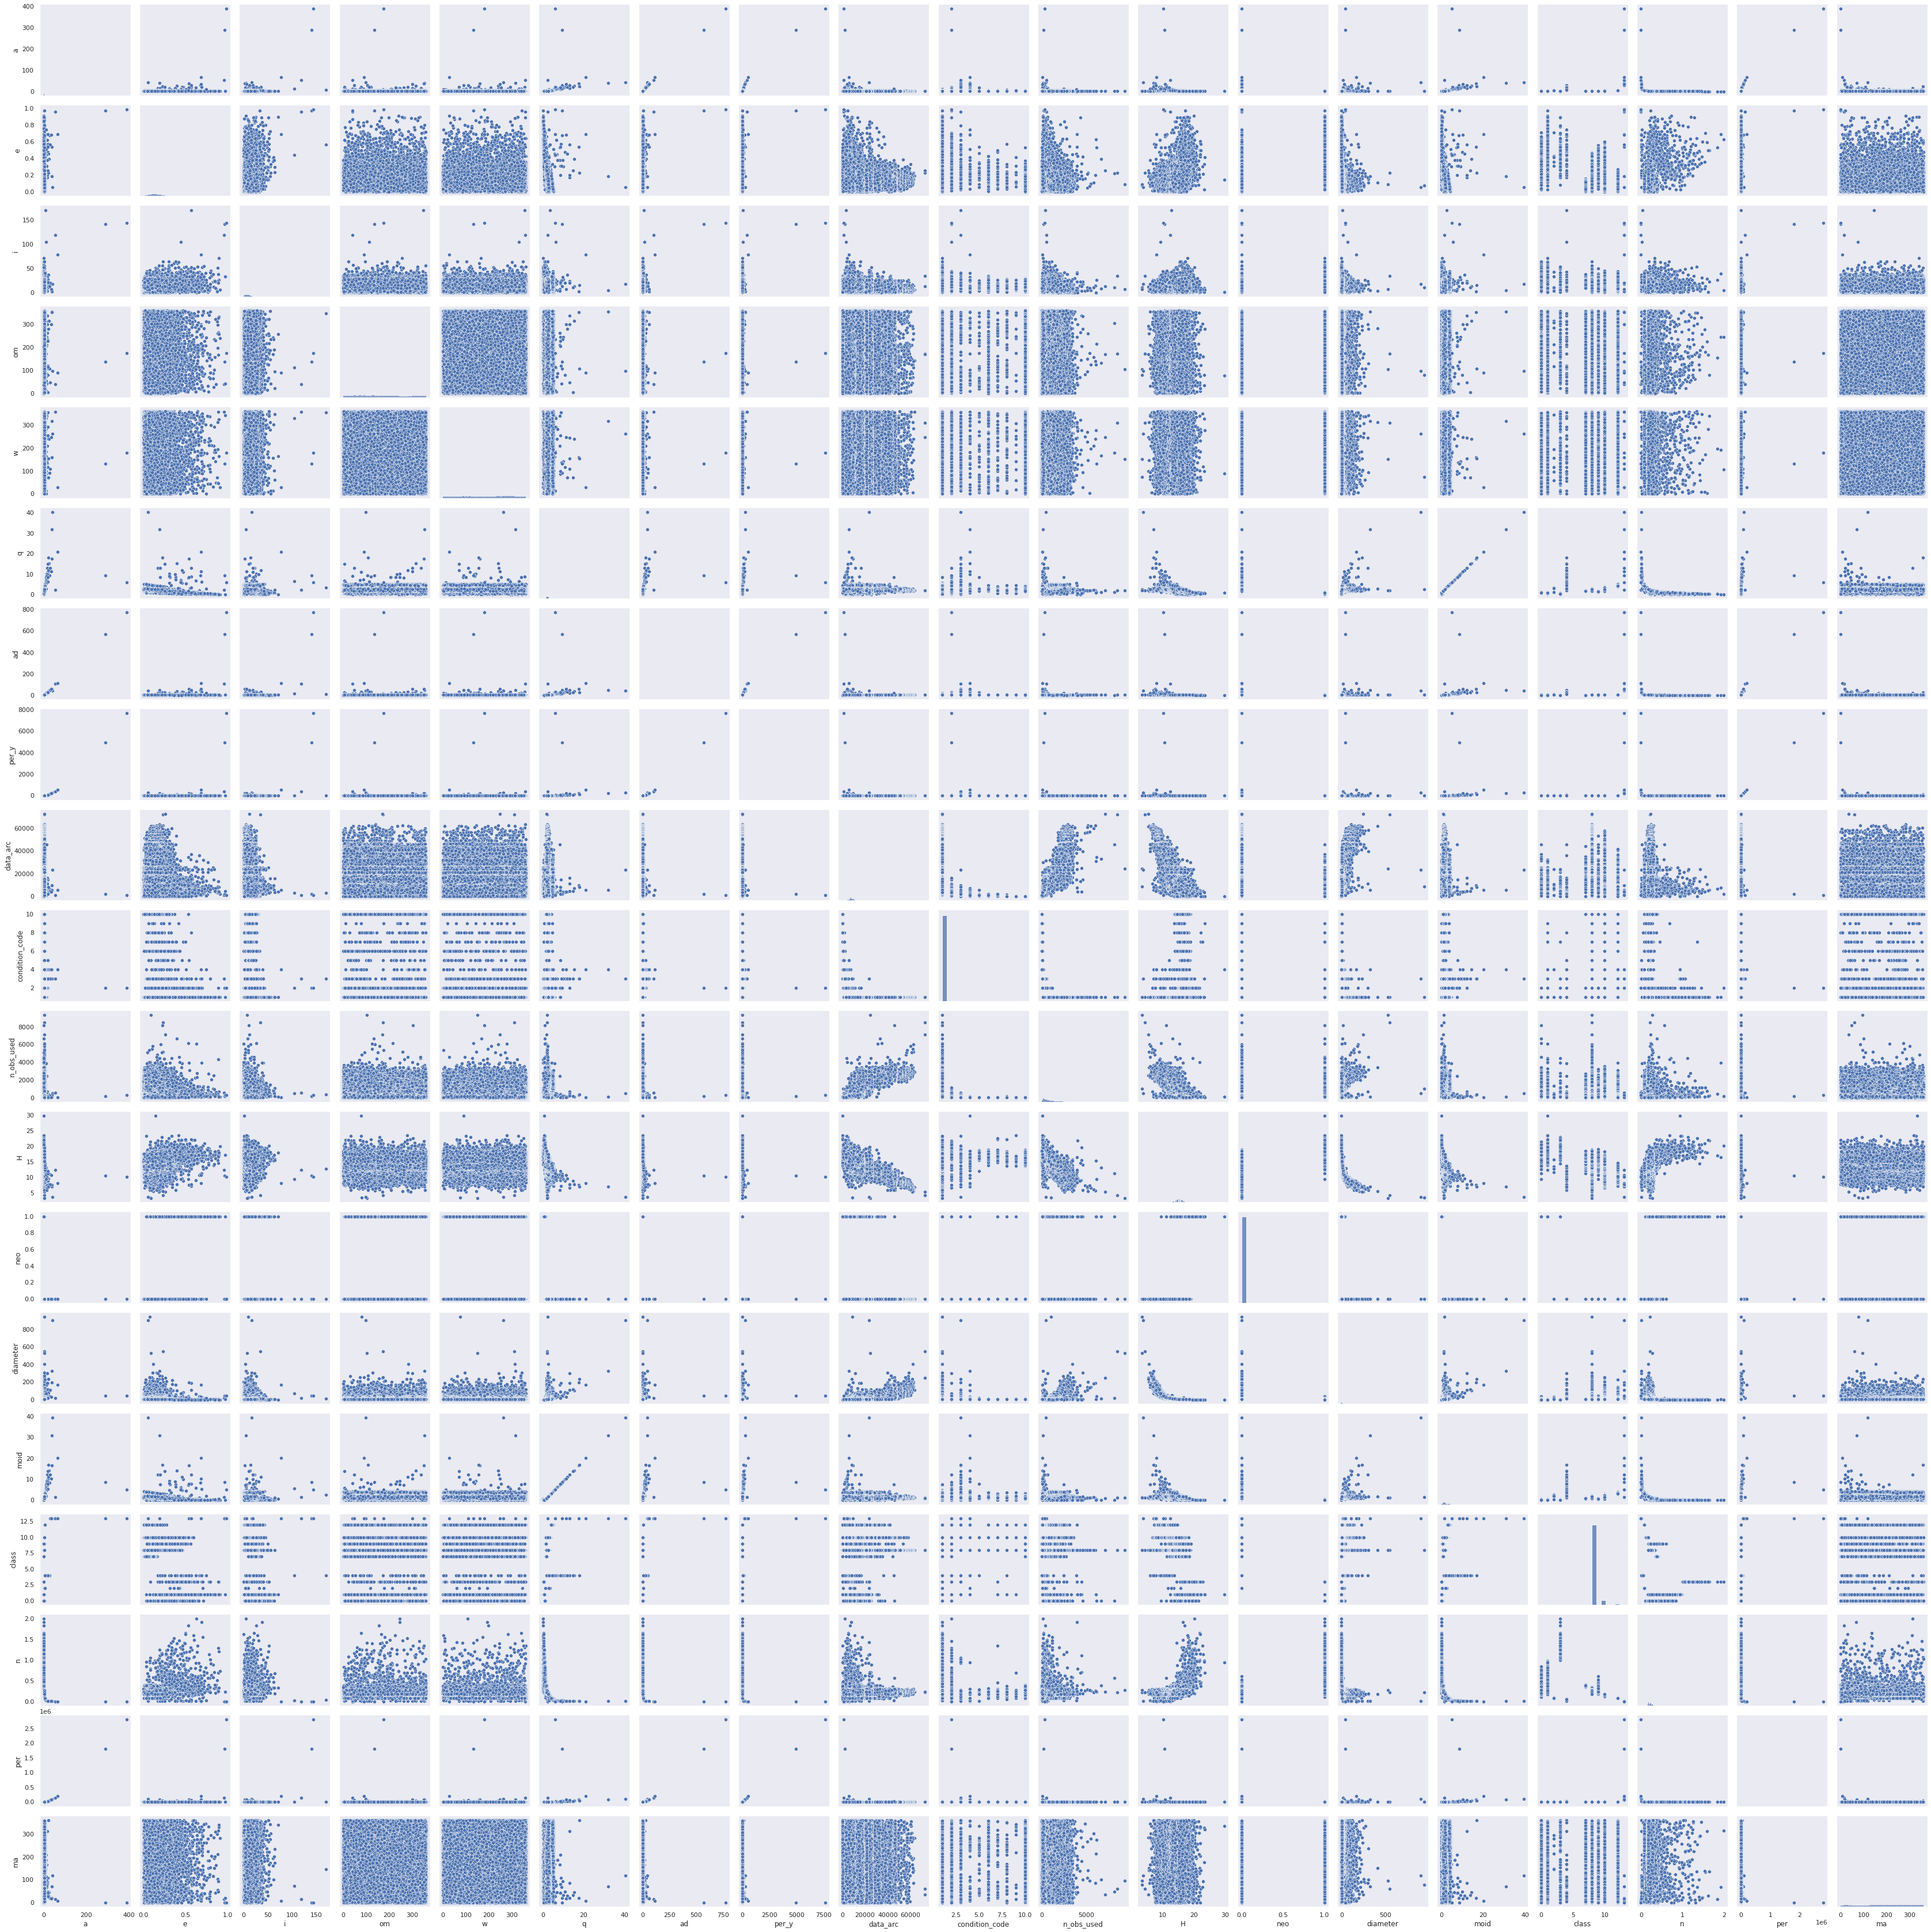

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_r)

plt.show()

In [ ]:
plt.subplots(figsize = (16,15))
sns.heatmap(df_regression.corr(),annot=True, annot_kws={'size':10})
# per, moid, H, per_y, ad, q, a

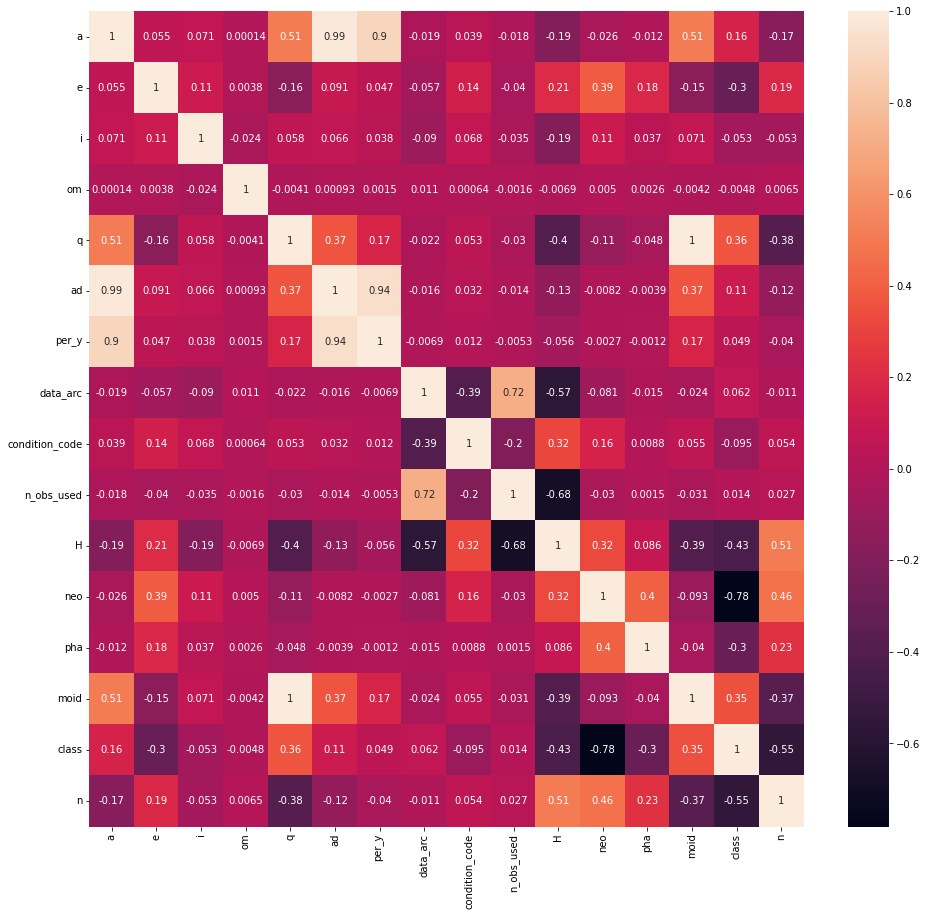

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (16,15))
sns.heatmap(df_classification.corr(),annot=True, annot_kws={'size':10})
# neo, class, n 

In [ ]:
sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_classification)

plt.show()

### Determine Feature Selection

### Regression

In [30]:
y = df_regression.diameter
x = df_regression.drop(columns=['diameter'])

In [31]:
from sklearn.feature_selection import SelectKBest
# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
transX = anova.fit_transform(x, y)

for i in range(len(x.columns)):
    print(f'{x.columns[i]}: {anova.scores_[i]}')

print(transX.shape)

a: 31.637196697611962
e: 1.7842577610228874
i: 1.6621992239947645
om: 1.0029678571803002
w: 0.9957726525102555
q: 11.095961249580835
ad: 32.88636968270681
per_y: 40.74103699750825
data_arc: 8.099009943513074
condition_code: 0.5430670263398989
n_obs_used: 4.7797993210753
H: 17.841635817082636
neo: 10.855769669869455
pha: 12.688456154927248
moid: 11.167513458143228
class: 9.089789442546143
n: 9.20323399210887
per: 40.74103699750813
ma: 1.0542990472843297
(127910, 10)


Based on the ANOVA, heatmap, and pairplot we can see that there are multiple features that have high importance when determining diameter. 


1.   per / per_y
2.   ad
3.   a
4.   H
5.   q
6.   moid
7.   neo
8.   n
9.   class
10.  data_arc

### Classification

In [32]:
x_c = df_classification.drop(columns=['pha'])
y_c = df_classification['pha']

In [33]:
x_c = df_classification.drop(columns='pha')
print("Classification ANOVA ", x_c.shape)
y_c = df_classification['pha']
print(y_c.shape)

# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
anova.fit(x_c, y_c)

for i in range(len(x_c.columns)):
   print(f'{x_c.columns[i]}: {anova.scores_[i]}')

Classification ANOVA  (16026, 14)
(16026,)
a: 1737.7520215502516
e: 39886.35927625323
i: 2308.9547737956104
om: 155.6645696563833
q: 3559.396231868444
ad: 364.8549950997669
per_y: 156.26142805250709
data_arc: 0.012366260191912351
n_obs_used: 207.82143611269493
H: 14285.585849616979
neo: 322916.6391752581
moid: 2675.563616195696
class: 207927.11653107012
n: 11266.345258430589


Based on the ANOVA and heatmap we can see that there are multiple features that have high importance when determining diameter. 


1.   neo
2.   class
3.   e
4.   q
5.   n
6.   moid
7.   i
8.   data_arc
9.   a
10.  condition_code

## Machine Learning Approaches

We tried multiple models for our regression prediction. When it came to parameter tuning, some took an excessive amount of resources and we chose to look elsewhere. If a model performed badly after gridsearch and 10-fold cross validation, we looked into more data and other methods of improving but inevitably found other models that performed well with less tuning and less computational cost. 

**All attempted models**

Regression:
*   Random Forest 
*   KNN
*   SGD
*   Lasso
*   Ridge
*   SVR

Classification
*   Logistic Regression



### Describe the ML methods that you used and the reasons for their choice. 
What is the family of machine learnign algorithms you are using and why? 
* Supervised or Unsupervised?
* Regression or classification?

### Justify ML algorithms in terms of the problem itself and the methods you want to use. 
* How did you employ them? 
* What features worked well and what didn't?
* Provide documentation for integration  

### Tools and Infrastructure Tried and Not Used

Describe any tools and infrastruicture that you tried and ended up not using.
What was the problem? 
Describe infrastructure used. 

## **Regression Models for predicting diameter**

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(transX ,y, test_size = 0.2, random_state=1)

#### KNN Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("Base KNN score:", knn.score(x_test,y_test))

Base KNN score: 0.6613847267130195


In [36]:
"""
param_grid = {'n_neighbors' : [3],
                'weights' : ['distance'],
                'metric' : ['chebyshev','euclidean', ]
                 }

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

"\nparam_grid = {'n_neighbors' : [3],\n                'weights' : ['distance'],\n                'metric' : ['chebyshev','euclidean', ]\n                 }\n\ngs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)\ngs = gs.fit(x_train, y_train)\nprint(gs.best_params_)\nprint(gs.best_score_)\n"

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_neighbors: 3
*   weights: 'distance'
*   metric: 'euclidean'

In [37]:
bestKNN = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
pred_knn_opt = bestKNN.predict(x_test)

print('Optimal KNN: ', bestKNN.score(x_test,y_test))

Optimal KNN:  0.6367102384591373


In [38]:
cross_val_KNN = cross_val_score(bestKNN, x_train, y_train, cv=10, n_jobs=16)
print("Optimal KNN CV mean score: ", cross_val_KNN.mean())

Optimal KNN CV mean score:  0.6346900496828048


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using KNN')

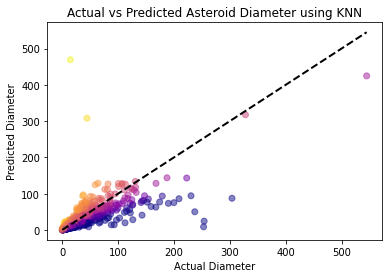

In [39]:
import matplotlib.pyplot as plt
color = 1 - (y_test / pred_knn_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_knn_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using KNN")

#### Epsilon-Support Vector Regression (SVR)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss

sc = ss()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr=SVR()

svr.fit(x_train_std, y_train)
pred_svr = svr.predict(x_test_std)
print("Base SVR score: ", svr.score(x_test_std, y_test))

In [ ]:
"""
param_grid = [{'C' : [.001, .01, .1, 1, 10],
                'epsilon' : [.001, .01, .1, 1, 10]}]
gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True, verbose=True, n_jobs=16)
svr.fit(x_train, ytrain)
gs = gs.fit(x_train, ytrain)
print(gs.best_params_)
print(gs.best_score_)
"""

Parameter tuning for SVR will be accomplished with gridsearchCV on parameters C and epsilon ranging from 0.001 to 100 by multiples of 10.

SVR was selected after attempting Stochastic Gradient Descent. After over 72 hrs of parameter tuning, approximately .40 was the highest R2 score achieved. SGD Regression on this dataset required the max_iter to be changed from the default of 1,000 to 1,000,000 to ensure convergence occured. Parameters epsilon and eta0 made almost no impact on the SGD Regression score, but a slight difference in the alpha caused the score to jump from approximately .40 into an unrealistically large integer.

Grid search returned the best performing parameters:

*   C: 10
*   epsilon: 1

In [ ]:
svr=SVR(C=10, epsilon=1)

svr.fit(x_train_std, y_train)
pred_svr_opt = svr.predict(x_test_std)

print("Optimal SVR score: ", svr.score(x_test,y_test))

In [ ]:
color = 1 - (y_test / pred_svr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_svr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using SVR")

#### Gradient Boosting Regressor

A fitted GBR model using it's default paramters. n_estimators = 100

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
print("Base GBR score: ",gbr.score(x_test, y_test))

Base GBR score:  0.8860433879474203


In [41]:
"""
param_grid = {'n_estimators' : [105],
             }
gbr = GradientBoostingRegressor()
gs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

"\nparam_grid = {'n_estimators' : [105],\n             }\ngbr = GradientBoostingRegressor()\ngs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)\ngs = gs.fit(x_train, y_train)\nprint(gs.best_params_)\nprint(gs.best_score_)\n"

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 105

In [42]:
gbr_opt = GradientBoostingRegressor(n_estimators=105, random_state=0)
gbr_opt.fit(x_train, y_train)
pred_gbr_opt = gbr_opt.predict(x_test)
print("Optimal GBR score: ",gbr_opt.score(x_test, y_test))

Optimal GBR score:  0.8855842001165629


In [43]:
cross_val_GBR = cross_val_score(gbr_opt, x_train, y_train, cv=10, n_jobs=16)
print("Optimal GBR CV mean score: ", cross_val_GBR.mean())

Optimal GBR CV mean score:  0.8888411931245235


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using GBR')

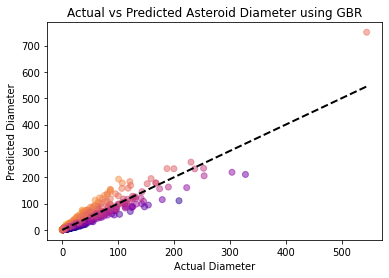

In [44]:
color = 1 - (y_test / pred_gbr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_gbr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using GBR")

#### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor()

rf_base.fit(x_train, y_train)
pred_rf_base = rf_base.predict(x_test)
print("Base RF score: ",rf_base.score(x_test,y_test))

Base RF score:  0.8889905965255248


In [46]:
"""
param_grid = [{'n_estimators' : [100, 150, 200, 250, 300],
               'max_depth' : [None, 10, 20, 30, 40],
               'min_samples_split' : [2, 3, 4]}]

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True)
gs.fit(xtrain,ytrain)
print("\nBest parameters: ",gs.best_params_)
print(gs.best_score_)
"""

'\nparam_grid = [{\'n_estimators\' : [100, 150, 200, 250, 300],\n               \'max_depth\' : [None, 10, 20, 30, 40],\n               \'min_samples_split\' : [2, 3, 4]}]\n\ngs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=\'r2\', cv=10, return_train_score=True)\ngs.fit(xtrain,ytrain)\nprint("\nBest parameters: ",gs.best_params_)\nprint(gs.best_score_)\n'

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 100
*   max_depth 20
*   min_samples_split: 3


In [47]:
rf_opt = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=3)

rf_opt.fit(x_train, y_train)
pred_rf_opt = rf_opt.predict(x_test)

print("Optimal RF score: ", rf_opt.score(x_test,y_test))

Optimal RF score:  0.8910513543401948


In [48]:
cross_val_rf = cross_val_score(rf_opt, x_train, y_train, cv=10, n_jobs=16)
print("Optimal RF CV mean score: ", cross_val_rf.mean())

Optimal RF CV mean score:  0.8817350833460156


In [49]:
color = 1 - (y_test / pred_rf_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_rf_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
# ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using RF")

Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using RF')

### **Classification models for predicting if an asteroid is hazardous:**

In [55]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x_c, y_c, stratify=y_c, test_size=.3, random_state=1)

pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain,ytrain)
xtest = pca.transform(xtest)

#### Logistic Regression

Base Logit:  0.6761647254575707


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

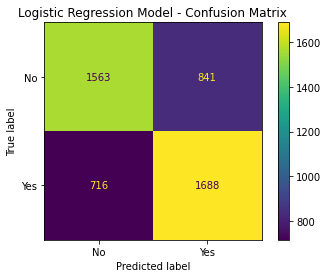

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67      2279
         1.0       0.70      0.67      0.68      2529

    accuracy                           0.68      4808
   macro avg       0.68      0.68      0.68      4808
weighted avg       0.68      0.68      0.68      4808



In [57]:
lreg = lr()
lreg.fit(xtrain, ytrain)
pred_lreg = lreg.predict(xtest)

print("Base Logit: ", lreg.score(xtest,ytest))

cm = confusion_matrix(ytest, pred_lreg)
plt.figure()
plot_confusion_matrix(lreg, xtest, ytest)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_lreg, ytest))

In [58]:
lreg_scores = cross_val_score(lreg, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(lreg_scores))

Average 10-fold score: 0.676


#### Support Vector Classification

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

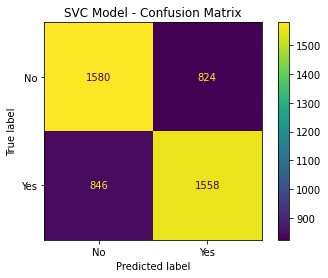

              precision    recall  f1-score   support

         0.0       0.66      0.65      0.65      2426
         1.0       0.65      0.65      0.65      2382

    accuracy                           0.65      4808
   macro avg       0.65      0.65      0.65      4808
weighted avg       0.65      0.65      0.65      4808



In [59]:
svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)

cm = confusion_matrix(ytest, pred_svc)
plt.figure()
plot_confusion_matrix(svc, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc, ytest))

In [60]:
svc_scores = cross_val_score(svc, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

Average 10-fold score: 0.656


In [61]:
svc_opt = SVC(C=150)
svc_opt.fit(xtrain,ytrain)
pred_svc_opt = svc_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_svc_opt)
plt.figure()
plot_confusion_matrix(svc_opt, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc_opt, ytest))

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      2414
         1.0       0.78      0.78      0.78      2394

    accuracy                           0.78      4808
   macro avg       0.78      0.78      0.78      4808
weighted avg       0.78      0.78      0.78      4808



In [62]:
svc_scores = cross_val_score(svc_opt, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

Average 10-fold score: 0.748


#### Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt)
plt.figure()
plot_confusion_matrix(dt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt, ytest))

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      2382
         1.0       0.79      0.78      0.78      2426

    accuracy                           0.78      4808
   macro avg       0.78      0.78      0.78      4808
weighted avg       0.78      0.78      0.78      4808



In [64]:
dt_scores = cross_val_score(dt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores))

Average 10-fold score: 0.784


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

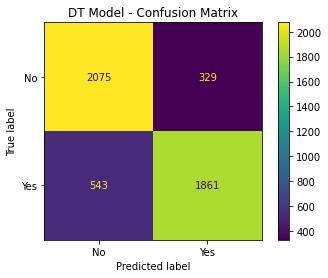

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83      2618
         1.0       0.77      0.85      0.81      2190

    accuracy                           0.82      4808
   macro avg       0.82      0.82      0.82      4808
weighted avg       0.82      0.82      0.82      4808



In [65]:
dt_opt = DecisionTreeClassifier(min_samples_leaf=25, max_depth=7)
dt_opt.fit(xtrain,ytrain)
pred_dt_opt = dt_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt_opt)
plt.figure()
plot_confusion_matrix(dt_opt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt_opt, ytest))

In [66]:
dt_scores_opt = cross_val_score(dt_opt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores_opt))

Average 10-fold score: 0.826


99.8 seems too good to be true and there is suspicion it may be overfitting. Next steps are to use more models, do more data analysis and address class imbalance.

## Experiments

Give a detailed summary of the results of your work.

 * Setup - Here is where you specify the exact performance measures you used.  
   * Describe the data used in experiment for presenting dataset: Datasheets for Dataset template 
   * Describe your accuracy or quality measure, and your performance (runtime or throughput) measure. 
   
 * Please use visualizations whenever possible. Include links to interactive visualizations if you built them. 
 
 * You can also submit a separated notebook as an appendix to your report if that makes the visualization/interaction task easier. 
   * It would be reasonable to submit your report as a notebook, but please make sure it runs on one of the two standard environments, and that you include any required files. 

## Conclusion
In this section give a high-level summary of your results. If the reader only reads one section of the report, this one should be it, and it should be self-contained.  You can refer back to the Experiments Section for elaborations. This section should be less than a page. In particular emphasize any results that were surprising.

## References
List the references that cited in your project.

## Appendix

Explain the contributions of each member to the project. Include all supporting materials, e.g., additional figures/tables, Python code technical derivations.